In [3]:
pip list

Package           VersionNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



----------------- -----------
asttokens         3.0.0
colorama          0.4.6
comm              0.2.2
debugpy           1.8.12
decorator         5.1.1
executing         2.2.0
ipykernel         6.29.5
ipython           8.31.0
jedi              0.19.2
jupyter_client    8.6.3
jupyter_core      5.7.2
matplotlib-inline 0.1.7
nest-asyncio      1.6.0
packaging         24.2
parso             0.8.4
pip               24.0
platformdirs      4.3.6
prompt_toolkit    3.0.50
psutil            6.1.1
pure_eval         0.2.3
Pygments          2.19.1
python-dateutil   2.9.0.post0
pywin32           308
pyzmq             26.2.0
setuptools        65.5.0
six               1.17.0
stack-data        0.6.3
tornado           6.4.2
traitlets         5.14.3
typing_extensions 4.12.2
wcwidth           0.2.13


In [5]:
pip install flask

  Using cached flask-3.1.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached jinja2-3.1.5-py3-none-any.whl.metadata (2.6 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
Using cached flask-3.1.0-py3-none-any.whl (102 kB)
Using cached blinker-1.9.0-py3-none-any.whl (8.5 kB)
Using cached click-8.1.8-py3-none-any.whl (98 kB)
Using cached itsdangerous-2.2.0-py3-none-any.whl (16 kB)
Using cached jinja2-3.1.5-py3-none-any.whl (134 kB)
Using cached werkzeug-3.1.3-py3-none-any.whl (224 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
from flask import Flask, render_template, request

In [9]:
flask.__version__

NameError: name 'flask' is not defined

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
import xgboost as xgb
from sklearn.metrics import classification_report

ModuleNotFoundError: No module named 'pandas'

In [2]:
data = pd.read_csv("train.csv")

In [ ]:
data.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [ ]:
data.sample(10)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
37293,37293,33,82000,MORTGAGE,11.0,PERSONAL,C,18000,13.98,0.23,N,10,0
39246,39246,25,50000,RENT,10.0,VENTURE,B,14000,9.63,0.28,N,3,0
27437,27437,27,34000,RENT,0.0,PERSONAL,C,10000,13.16,0.29,N,10,1
10269,10269,22,34000,MORTGAGE,5.0,EDUCATION,B,13500,10.62,0.40,N,4,0
54453,54453,30,480000,MORTGAGE,14.0,VENTURE,B,15000,11.12,0.03,N,6,0
10031,10031,24,65000,RENT,3.0,MEDICAL,C,6000,13.49,0.09,N,4,0
5619,5619,31,30000,RENT,0.0,VENTURE,D,4000,14.84,0.13,N,7,1
30257,30257,29,54000,MORTGAGE,8.0,VENTURE,C,11000,13.16,0.20,Y,9,0
13996,13996,28,45000,MORTGAGE,12.0,MEDICAL,C,13225,15.96,0.30,Y,8,0
48049,48049,24,67350,RENT,5.0,MEDICAL,B,9600,10.37,0.14,N,2,0


In [ ]:
data.loan_status.value_counts()

loan_status
0    50295
1     8350
Name: count, dtype: int64

## EDA

#### person_age

In [ ]:
data.person_age.value_counts()

person_age
23     7726
22     7051
24     6395
25     5067
27     4450
26     3874
28     3707
29     3270
30     2333
31     1917
21     1795
32     1565
33     1306
36     1117
34     1041
37      992
35      862
38      745
39      536
40      438
41      433
43      320
42      291
44      229
46      164
45      163
47      125
48       97
53       75
51       69
50       63
52       62
54       60
49       59
58       35
55       34
56       29
60       28
57       25
65       13
61       13
20       12
66       11
64       10
70       10
62        7
69        6
59        6
73        3
84        2
80        2
76        1
123       1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

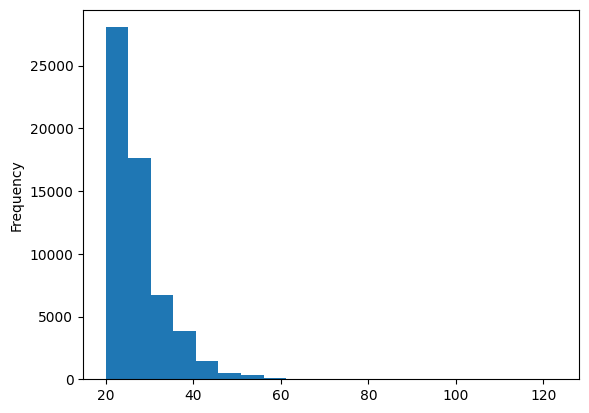

In [ ]:
data.person_age.plot(kind='hist', bins=20)

<Axes: xlabel='person_age', ylabel='Density'>

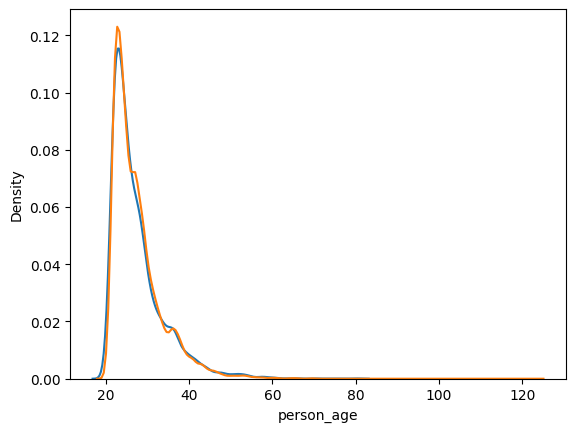

In [ ]:
sns.kdeplot(data[data["loan_status"] == 1].person_age, label="1")
sns.kdeplot(data[data["loan_status"] == 0].person_age, label="0")

In [ ]:
(pd.crosstab(data.loan_status, data.person_age, normalize='columns')*100).T

loan_status,0,1
person_age,,
20,75.000000,25.000000
21,82.896936,17.103064
22,83.973904,16.026096
23,86.189490,13.810510
24,85.957780,14.042220
25,85.198342,14.801658
26,85.209086,14.790914
27,88.089888,11.910112
28,85.918533,14.081467


<Axes: xlabel='loan_status', ylabel='person_age'>

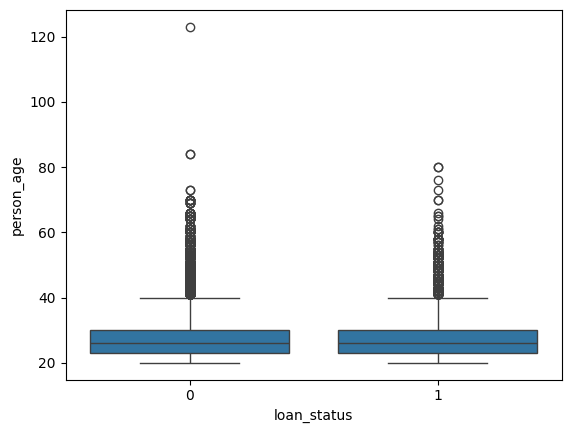

In [ ]:
sns.boxplot(x='loan_status', y='person_age', data=data)

In [ ]:
data[data.loan_status == 0].sort_values('person_age', ascending=False).head(10)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
47336,47336,123,36000,MORTGAGE,7.0,PERSONAL,B,6700,10.75,0.18,N,4,0
4962,4962,84,108928,MORTGAGE,3.0,DEBTCONSOLIDATION,A,6000,7.51,0.06,N,25,0
6750,6750,84,94800,MORTGAGE,2.0,PERSONAL,D,10000,14.09,0.11,N,22,0
24266,24266,73,40000,RENT,0.0,MEDICAL,B,1800,11.36,0.04,N,21,0
6425,6425,73,32004,MORTGAGE,3.0,PERSONAL,B,7500,10.65,0.24,N,23,0
5597,5597,70,21600,RENT,0.0,MEDICAL,A,6000,6.99,0.28,N,24,0
34544,34544,70,60000,RENT,0.0,PERSONAL,A,4200,8.59,0.07,N,24,0
24335,24335,70,14400,RENT,0.0,MEDICAL,B,2000,10.65,0.14,N,21,0
38268,38268,70,90000,RENT,0.0,PERSONAL,B,12000,11.36,0.13,N,24,0
39143,39143,70,93000,RENT,1.0,MEDICAL,A,4000,6.00,0.04,N,24,0


In [ ]:
data[data.loan_status == 1].sort_values('person_age', ascending=False).head(10)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
21953,21953,80,30000,RENT,7.0,MEDICAL,D,5000,14.96,0.17,N,24,1
15588,15588,80,54000,RENT,27.0,PERSONAL,A,10000,6.62,0.19,N,25,1
16954,16954,76,30000,RENT,2.0,HOMEIMPROVEMENT,D,6500,16.77,0.21,N,24,1
25499,25499,73,42000,RENT,7.0,PERSONAL,D,13750,14.96,0.32,N,24,1
48382,48382,70,17000,RENT,0.0,PERSONAL,B,1500,10.38,0.09,N,21,1
53847,53847,70,37000,RENT,2.0,PERSONAL,B,3000,10.37,0.08,N,21,1
40466,40466,66,24696,RENT,1.0,HOMEIMPROVEMENT,C,8875,13.98,0.36,N,27,1
47870,47870,65,90000,RENT,3.0,PERSONAL,D,20000,14.96,0.22,N,27,1
16792,16792,65,158000,MORTGAGE,3.0,PERSONAL,D,12000,14.84,0.08,N,26,1
28101,28101,64,26400,RENT,3.0,DEBTCONSOLIDATION,D,2500,15.99,0.09,Y,22,1


In [ ]:
data.shape

(58644, 13)

In [ ]:
## Here We Drop the rows with person_age = 123 as it is an outlier
data.drop(data[data.person_age == 123].index, inplace=True)

#### person_income

<Axes: ylabel='Frequency'>

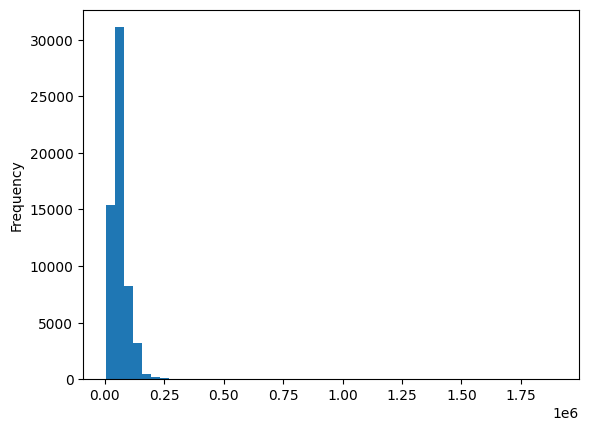

In [ ]:
data.person_income.plot(kind='hist', bins=50)

<Axes: xlabel='loan_status', ylabel='person_income'>

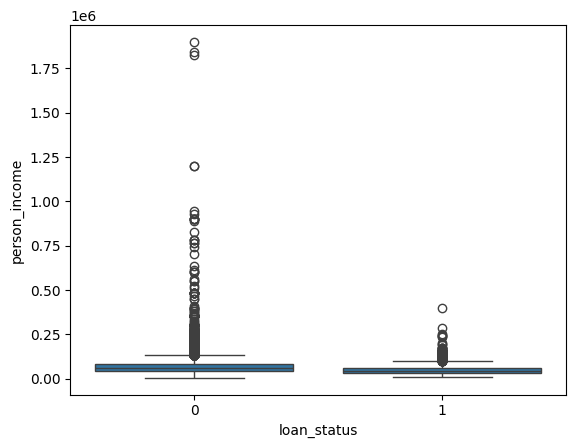

In [ ]:
sns.boxplot(x='loan_status', y='person_income', data=data)

In [ ]:
data[data.loan_status == 0].sort_values('person_income', ascending=False).head(20)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
44186,44186,31,741600,MORTGAGE,3.0,MEDICAL,A,12000,7.14,0.02,N,10,0
42939,42939,26,700000,MORTGAGE,10.0,EDUCATION,B,2000,12.69,0.03,N,4,0
12925,12925,30,636000,MORTGAGE,2.0,DEBTCONSOLIDATION,B,20000,11.48,0.03,N,5,0
20120,20120,33,612000,RENT,3.0,VENTURE,C,7000,12.73,0.12,Y,7,0
8151,8151,29,600000,MORTGAGE,14.0,DEBTCONSOLIDATION,A,7000,8.49,0.01,N,8,0
55574,55574,31,600000,RENT,7.0,HOMEIMPROVEMENT,B,25000,11.11,0.04,N,5,0
18380,18380,28,600000,MORTGAGE,12.0,EDUCATION,B,5500,10.75,0.01,N,5,0
31900,31900,34,564000,RENT,1.0,DEBTCONSOLIDATION,B,6000,9.91,0.01,N,7,0
11668,11668,34,550000,MORTGAGE,12.0,EDUCATION,A,10400,7.43,0.02,N,10,0
38863,38863,40,550000,MORTGAGE,5.0,VENTURE,B,18000,11.12,0.03,N,13,0


In [ ]:
data[data.loan_status == 1].sort_values('person_income', ascending=False).head(10)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
21238,21238,39,397800,RENT,5.0,PERSONAL,B,14000,11.48,0.03,N,9,1
20996,20996,34,287300,RENT,1.0,MEDICAL,A,15000,7.40,0.04,N,8,1
54106,54106,23,253000,RENT,2.0,HOMEIMPROVEMENT,D,10000,14.91,0.04,Y,3,1
21561,21561,23,246725,OWN,4.0,MEDICAL,D,24250,15.31,0.11,Y,2,1
20896,20896,28,242400,MORTGAGE,12.0,HOMEIMPROVEMENT,B,35000,11.71,0.15,N,10,1
24876,24876,29,238000,RENT,1.0,DEBTCONSOLIDATION,B,10000,11.71,0.04,N,10,1
37534,37534,25,232050,MORTGAGE,9.0,MEDICAL,D,6000,15.70,0.26,N,2,1
45765,45765,33,200000,RENT,0.0,HOMEIMPROVEMENT,C,23500,15.96,0.12,N,5,1
31066,31066,49,192000,MORTGAGE,5.0,HOMEIMPROVEMENT,D,25000,14.83,0.13,N,17,1
19457,19457,25,188000,RENT,9.0,DEBTCONSOLIDATION,B,25000,12.18,0.13,N,3,1


In [ ]:
# Here we drop the rows with person_income > 750000 as they are outliers
data.drop(data[data.person_income > 750000].index, inplace=True)

#### loan_amnt

In [ ]:
data.loan_amnt.tail(5)

58640    25000
58641    10000
58642     6800
58643     5000
58644    15000
Name: loan_amnt, dtype: int64

<Axes: ylabel='Frequency'>

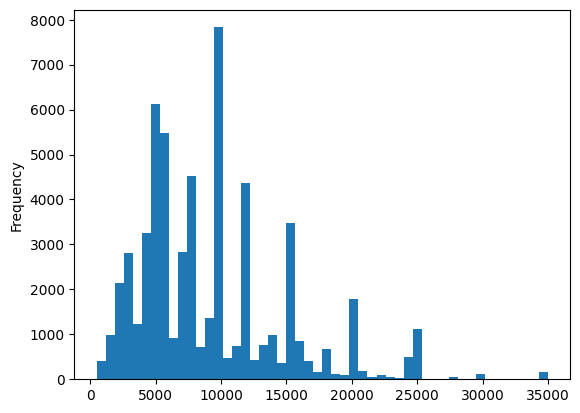

In [ ]:
data.loan_amnt.plot(kind='hist', bins=50)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

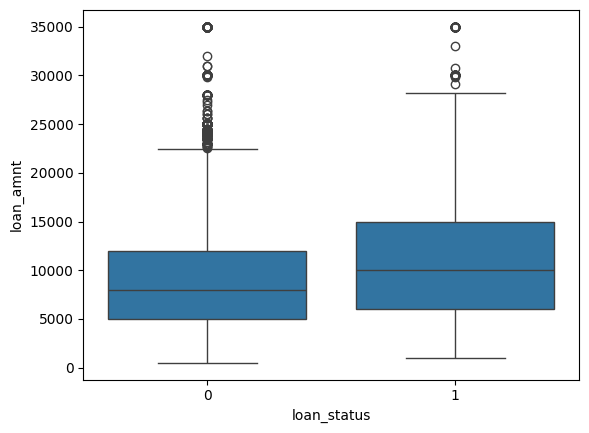

In [ ]:
sns.boxplot(x='loan_status', y='loan_amnt', data=data)

In [ ]:
data[data.loan_status == 0].sort_values('loan_amnt', ascending=False).head(10)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
10416,10416,26,95000,MORTGAGE,10.0,MEDICAL,C,35000,13.43,0.37,Y,2,0
47486,47486,33,95000,MORTGAGE,5.0,EDUCATION,A,35000,7.90,0.37,N,6,0
54996,54996,28,200000,MORTGAGE,12.0,VENTURE,B,35000,12.69,0.17,N,5,0
21689,21689,39,119000,OWN,16.0,HOMEIMPROVEMENT,B,35000,12.18,0.29,N,13,0
41354,41354,29,125000,MORTGAGE,13.0,DEBTCONSOLIDATION,A,35000,8.90,0.28,N,10,0
39963,39963,35,100596,MORTGAGE,2.0,PERSONAL,B,35000,10.59,0.35,N,6,0
32828,32828,26,190000,MORTGAGE,10.0,DEBTCONSOLIDATION,B,35000,11.58,0.21,N,3,0
46464,46464,25,90000,MORTGAGE,9.0,PERSONAL,C,35000,12.73,0.37,N,2,0
17640,17640,23,350000,OWN,7.0,PERSONAL,A,35000,7.49,0.11,N,4,0
52187,52187,31,95000,MORTGAGE,3.0,EDUCATION,C,35000,15.23,0.37,N,6,0


In [ ]:
data[data.loan_status == 1].sort_values('loan_amnt', ascending=False).head(20)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
43415,43415,24,96000,MORTGAGE,8.0,HOMEIMPROVEMENT,B,35000,12.18,0.36,N,4,1
31299,31299,26,138000,RENT,2.0,HOMEIMPROVEMENT,D,35000,14.91,0.25,Y,2,1
20896,20896,28,242400,MORTGAGE,12.0,HOMEIMPROVEMENT,B,35000,11.71,0.15,N,10,1
17428,17428,36,80000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.62,0.44,N,11,1
47394,47394,22,85000,RENT,6.0,VENTURE,D,35000,15.65,0.41,N,4,1
43819,43819,34,114054,RENT,2.0,DEBTCONSOLIDATION,B,35000,11.49,0.33,N,5,1
33063,33063,25,85000,RENT,9.0,VENTURE,A,35000,7.90,0.41,N,2,1
48628,48628,26,85000,RENT,8.0,PERSONAL,A,35000,7.90,0.41,N,2,1
46240,46240,30,95000,RENT,6.0,VENTURE,B,35000,10.38,0.37,N,5,1
42658,42658,23,78000,RENT,3.0,DEBTCONSOLIDATION,B,35000,10.65,0.44,N,3,1


In [ ]:
# Correlation Between loan_amnt and person_income
data.loan_amnt.corr(data.person_income)

<Axes: xlabel='loan_amnt', ylabel='person_income'>

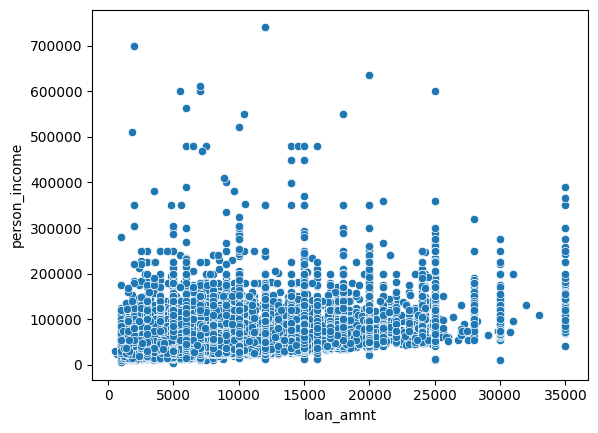

In [ ]:
sns.scatterplot(x='loan_amnt', y='person_income', data=data)

#### loan_percent_income

In [ ]:
data.loan_percent_income.max(), data.loan_percent_income.min()

(0.83, 0.0)

<Axes: xlabel='loan_status', ylabel='loan_percent_income'>

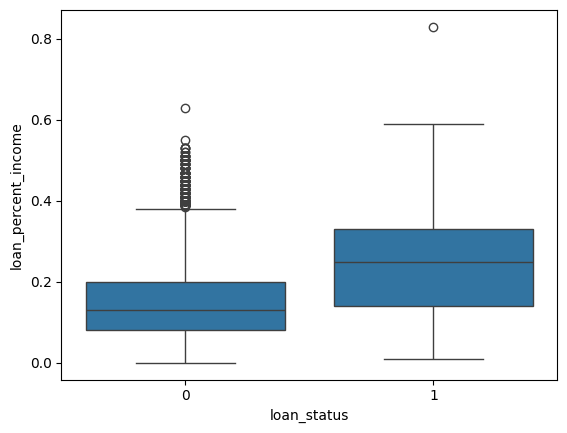

In [ ]:
sns.boxplot(x='loan_status', y='loan_percent_income', data=data)

In [ ]:
data[data.loan_status == 0].sort_values('loan_percent_income', ascending=False).head(20)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
56034,56034,35,40000,OWN,1.0,HOMEIMPROVEMENT,B,25000,11.86,0.63,N,8,0
37533,37533,35,54500,MORTGAGE,19.0,DEBTCONSOLIDATION,B,30000,9.91,0.55,N,5,0
53404,53404,44,47000,OWN,14.0,HOMEIMPROVEMENT,A,24000,6.99,0.53,N,13,0
25759,25759,26,47000,OWN,2.0,EDUCATION,B,25000,11.11,0.53,N,4,0
57219,57219,26,47000,MORTGAGE,10.0,DEBTCONSOLIDATION,A,25000,7.90,0.53,N,2,0
37014,37014,39,40000,OWN,0.0,PERSONAL,A,21000,6.17,0.53,N,13,0
6850,6850,23,48000,MORTGAGE,7.0,MEDICAL,B,25000,11.48,0.52,N,3,0
29678,29678,34,48000,RENT,5.0,DEBTCONSOLIDATION,B,25000,10.74,0.52,N,6,0
2138,2138,22,27800,OWN,2.0,PERSONAL,B,13250,11.71,0.51,N,4,0
21941,21941,22,48000,MORTGAGE,3.0,PERSONAL,B,24250,9.99,0.51,N,3,0


In [ ]:
data[data.loan_status == 1].sort_values('loan_percent_income', ascending=False).head(20)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
49179,49179,39,12000,RENT,0.0,PERSONAL,C,16000,10.78,0.83,N,12,1
54980,54980,22,69000,RENT,0.0,VENTURE,D,3775,18.25,0.59,N,4,1
44806,44806,40,14400,RENT,2.0,HOMEIMPROVEMENT,C,8000,14.27,0.56,N,15,1
21747,21747,36,18000,RENT,0.0,HOMEIMPROVEMENT,E,12000,18.39,0.56,Y,12,1
51057,51057,58,13200,RENT,2.0,VENTURE,D,7000,8.49,0.54,N,21,1
31995,31995,27,29120,RENT,0.0,EDUCATION,B,15000,10.99,0.52,N,9,1
45722,45722,26,38000,RENT,2.0,DEBTCONSOLIDATION,C,19000,13.48,0.52,N,2,1
25400,25400,48,19200,OWN,1.0,PERSONAL,B,9600,9.51,0.52,N,16,1
21020,21020,28,29000,MORTGAGE,11.0,DEBTCONSOLIDATION,E,15250,16.70,0.52,N,6,1
20975,20975,22,30000,RENT,6.0,PERSONAL,A,15000,6.62,0.52,N,4,1


In [ ]:
(pd.crosstab(data.loan_status, data.loan_percent_income, normalize='columns')*100).T

loan_status,0,1
loan_percent_income,,
0.00,100.000000,0.000000
0.01,96.153846,3.846154
0.02,95.023697,4.976303
0.03,94.760213,5.239787
0.04,93.064612,6.935388
...,...,...
0.55,100.000000,0.000000
0.56,0.000000,100.000000
0.59,0.000000,100.000000


In [ ]:
# Here We Drop Loan Percent Income Columns BEcause they are not useful
data.drop(columns="loan_percent_income", inplace=True)

#### loan_int_rate

In [ ]:
data.loan_int_rate.value_counts()

loan_int_rate
10.99    2183
7.51     2149
7.88     1759
7.49     1609
13.49    1412
         ... 
8.45        1
17.44       1
20.25       1
7.94        1
10.03       1
Name: count, Length: 362, dtype: int64

In [ ]:
data.loan_int_rate.nunique()

362

<Axes: ylabel='Frequency'>

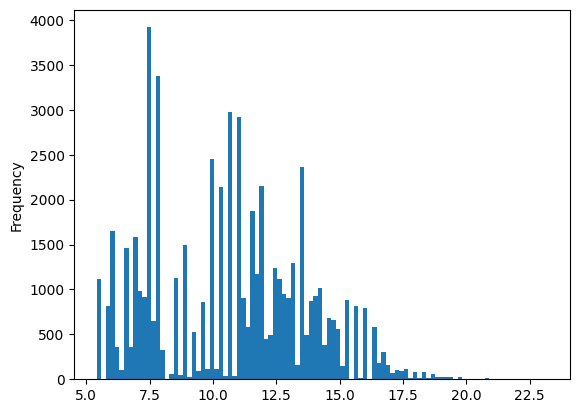

In [ ]:
data.loan_int_rate.plot(kind='hist', bins=100)

<Axes: xlabel='loan_status', ylabel='loan_int_rate'>

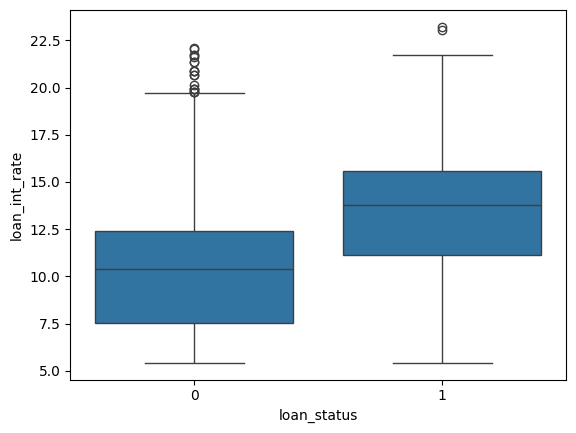

In [ ]:
sns.boxplot(x='loan_status', y='loan_int_rate', data=data)

<Axes: xlabel='loan_int_rate', ylabel='Count'>

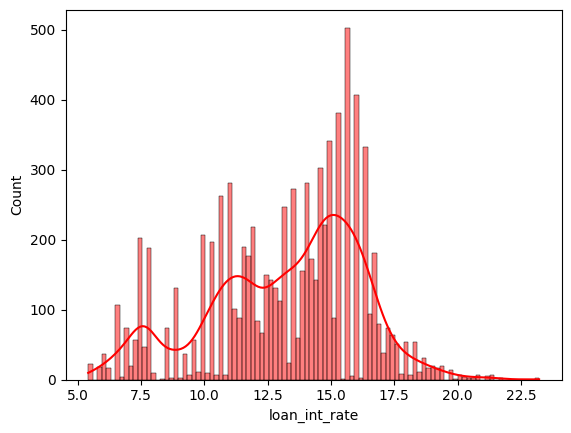

In [ ]:
sns.histplot(data[data["loan_status"] == 1]["loan_int_rate"], bins=100, color='red', kde=True)

<Axes: xlabel='loan_int_rate', ylabel='Count'>

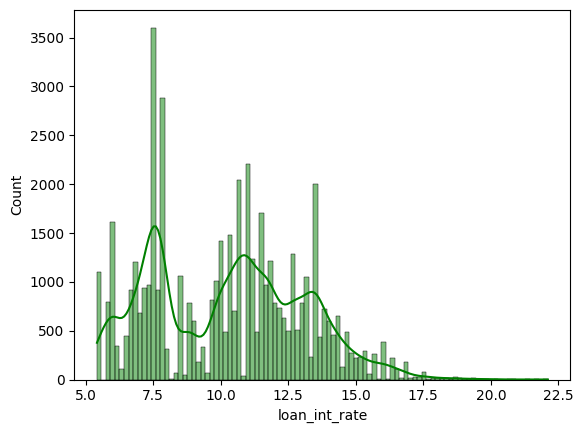

In [ ]:
sns.histplot(data[data["loan_status"] == 0]["loan_int_rate"], bins=100, color='green', kde=True)

<Axes: xlabel='loan_int_rate', ylabel='Density'>

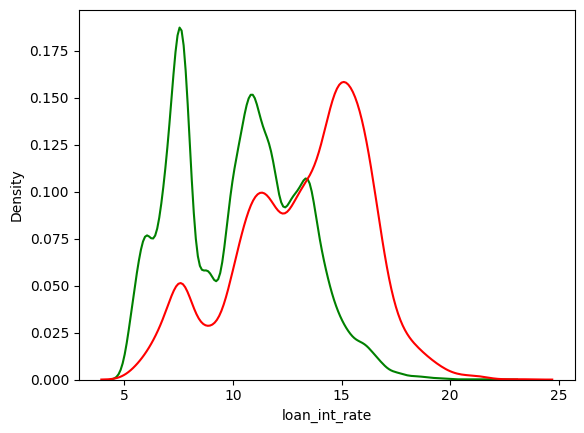

In [ ]:
sns.kdeplot(data[data["loan_status"] == 0].loan_int_rate, label="0", color='green')
sns.kdeplot(data[data["loan_status"] == 1].loan_int_rate, label="1", color='red')

<Axes: xlabel='loan_int_rate', ylabel='Count'>

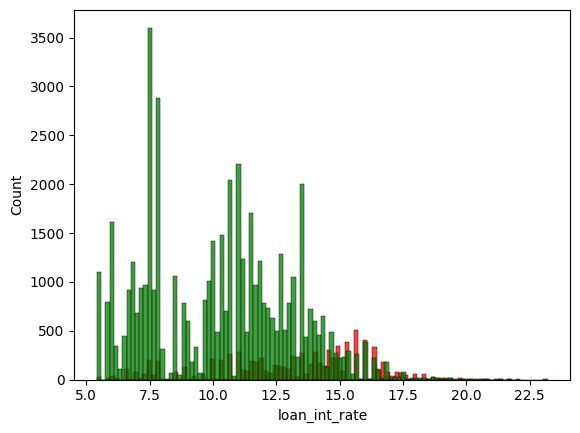

In [ ]:
sns.histplot(data[data["loan_status"] == 0]["loan_int_rate"], bins=100, color='green')
sns.histplot(data[data["loan_status"] == 1]["loan_int_rate"], bins=100, color='red')

In [ ]:
data[data.loan_status == 1].sort_values('loan_int_rate', ascending=False).head(20)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
53095,29,60000,RENT,0.0,VENTURE,G,19750,23.22,Y,7,1
41077,22,25200,RENT,3.0,VENTURE,E,8700,23.06,Y,4,1
8140,23,73500,RENT,7.0,HOMEIMPROVEMENT,F,5000,21.74,N,4,1
4996,22,34000,RENT,2.0,DEBTCONSOLIDATION,F,3000,21.74,Y,4,1
51889,50,52500,RENT,9.0,MEDICAL,F,4000,21.36,Y,15,1
1136,25,48000,RENT,3.0,VENTURE,F,15500,21.36,N,3,1
2237,22,59000,MORTGAGE,4.0,VENTURE,F,6000,21.36,Y,2,1
27225,50,72000,MORTGAGE,2.0,HOMEIMPROVEMENT,F,21000,21.36,N,11,1
16475,23,19000,RENT,0.0,PERSONAL,F,5000,21.36,N,3,1
38673,46,44000,RENT,2.0,PERSONAL,F,4000,21.36,Y,16,1


In [ ]:
data[data.loan_status == 0].sort_values('loan_int_rate', ascending=False).head(20)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
5353,29,140000,RENT,2.0,HOMEIMPROVEMENT,G,6000,22.11,Y,10,0
2409,31,70600,RENT,1.0,PERSONAL,F,9000,22.06,Y,6,0
57109,27,87800,RENT,5.0,VENTURE,F,15175,21.74,N,10,0
22400,36,45000,MORTGAGE,18.0,EDUCATION,F,5000,21.74,Y,17,0
10790,38,145000,MORTGAGE,0.0,PERSONAL,G,25000,21.64,N,16,0
41835,37,42000,RENT,5.0,PERSONAL,F,2500,21.36,Y,17,0
33074,34,90000,MORTGAGE,6.0,PERSONAL,F,8000,21.36,Y,9,0
49187,24,72000,MORTGAGE,8.0,VENTURE,F,10000,20.89,N,2,0
50532,28,105018,RENT,2.0,EDUCATION,F,12900,20.89,Y,6,0
36080,23,72000,RENT,0.0,VENTURE,F,10000,20.89,Y,3,0


In [ ]:
# loan_int_rate might not correlate with loan_status with we will keep it for now and see how it performs in the model

#### person_emp_length

In [ ]:
data.person_emp_length.value_counts()

person_emp_length
0.0      7585
2.0      7267
3.0      6473
5.0      5839
4.0      5459
1.0      5203
6.0      4901
7.0      4274
8.0      3011
9.0      2288
11.0     1490
12.0     1105
10.0     1072
13.0      796
14.0      590
15.0      367
16.0      279
17.0      168
18.0      152
21.0       78
19.0       72
20.0       65
22.0       20
24.0       14
23.0       12
26.0       11
25.0        8
27.0        7
31.0        5
28.0        4
30.0        2
123.0       2
41.0        2
29.0        2
35.0        1
39.0        1
Name: count, dtype: int64

In [ ]:
data.person_emp_length.nunique()

36

<Axes: ylabel='Frequency'>

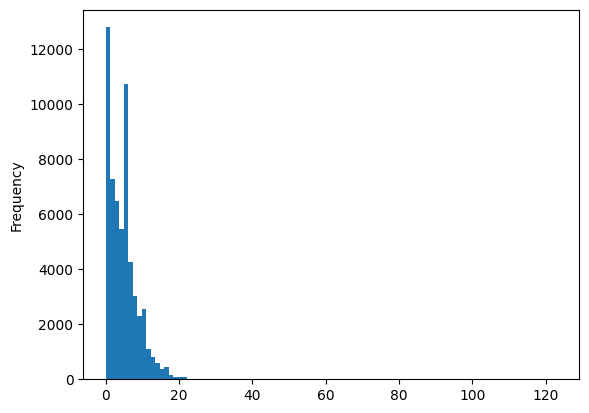

In [ ]:
data.person_emp_length.plot(kind='hist', bins=100)

<Axes: xlabel='person_emp_length', ylabel='Count'>

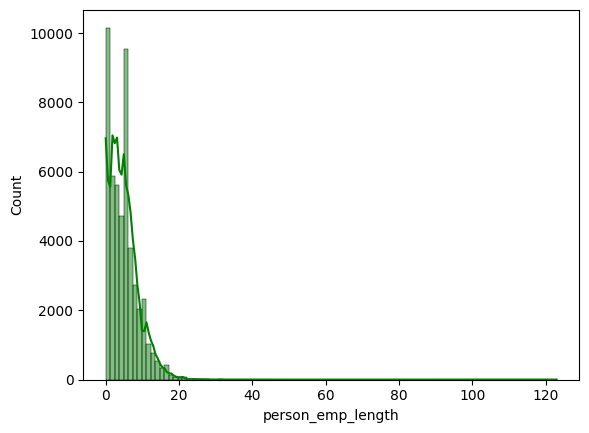

In [ ]:
sns.histplot(data[data["loan_status"] == 0]["person_emp_length"], bins=100, color='green', kde=True)

<Axes: xlabel='person_emp_length', ylabel='Count'>

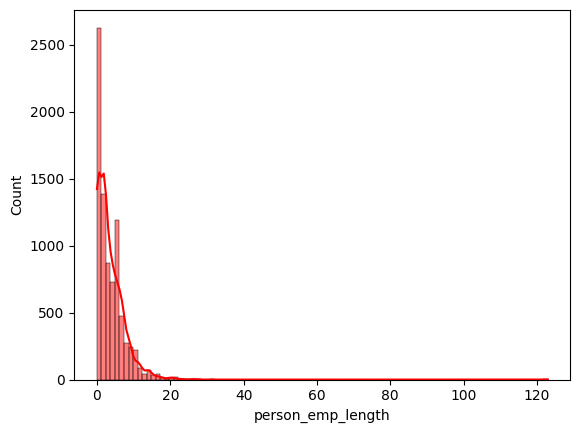

In [ ]:
sns.histplot(data[data["loan_status"] == 1]["person_emp_length"], bins=100, color='red', kde=True)

<Axes: xlabel='person_emp_length', ylabel='Density'>

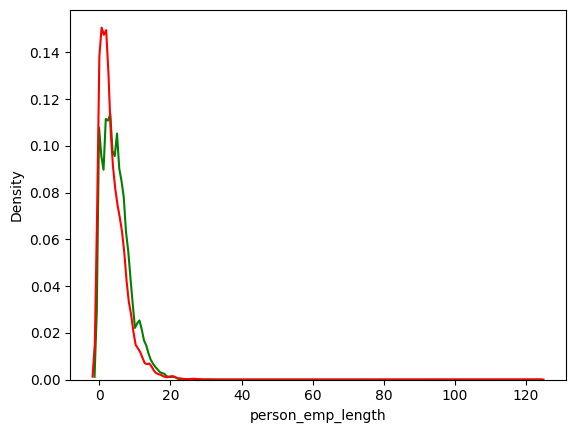

In [ ]:
sns.kdeplot(data[data["loan_status"] == 0].person_emp_length, label="0", color='green')
sns.kdeplot(data[data["loan_status"] == 1].person_emp_length, label="1", color='red')

In [ ]:
data[data.loan_status == 0].sort_values('person_emp_length', ascending=False).head(10)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
49252,49252,21,192000,MORTGAGE,123.0,VENTURE,B,20000,11.49,N,2,0
9997,9997,58,48000,RENT,41.0,PERSONAL,D,7500,13.55,Y,24,0
26125,26125,43,56000,RENT,41.0,HOMEIMPROVEMENT,B,2000,10.99,N,14,0
50559,50559,56,70000,RENT,39.0,MEDICAL,B,8000,11.36,N,17,0
24214,24214,43,50000,RENT,35.0,DEBTCONSOLIDATION,A,9000,5.42,N,16,0
48287,48287,48,70000,MORTGAGE,31.0,HOMEIMPROVEMENT,A,9000,8.94,N,8,0
52038,52038,38,42000,MORTGAGE,31.0,VENTURE,B,11000,11.49,N,14,0
39112,39112,46,84000,MORTGAGE,31.0,HOMEIMPROVEMENT,D,20000,17.49,N,8,0
53832,53832,46,52000,MORTGAGE,31.0,VENTURE,B,10000,9.91,N,16,0
28750,28750,53,45000,MORTGAGE,30.0,DEBTCONSOLIDATION,C,4000,12.73,N,16,0


In [ ]:
data[data.loan_status == 1].sort_values('person_emp_length', ascending=False).head(10)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
41079,41079,28,60350,MORTGAGE,123.0,MEDICAL,D,25000,15.95,Y,6,1
29271,29271,47,53913,MORTGAGE,31.0,HOMEIMPROVEMENT,B,7000,10.71,N,13,1
48963,48963,46,24832,OTHER,28.0,DEBTCONSOLIDATION,B,11500,12.53,N,12,1
50070,50070,43,73000,RENT,27.0,HOMEIMPROVEMENT,D,20000,15.33,Y,16,1
17542,17542,38,118000,MORTGAGE,27.0,VENTURE,B,25000,11.58,N,13,1
15588,15588,80,54000,RENT,27.0,PERSONAL,A,10000,6.62,N,25,1
35544,35544,42,62900,MORTGAGE,26.0,MEDICAL,D,10000,15.33,N,13,1
22126,22126,42,98000,MORTGAGE,26.0,DEBTCONSOLIDATION,D,15000,16.29,N,14,1
7117,7117,41,32000,RENT,26.0,PERSONAL,D,2500,16.29,N,14,1
54806,54806,41,78996,MORTGAGE,25.0,HOMEIMPROVEMENT,B,9000,12.18,N,17,1


<Axes: xlabel='loan_status', ylabel='person_emp_length'>

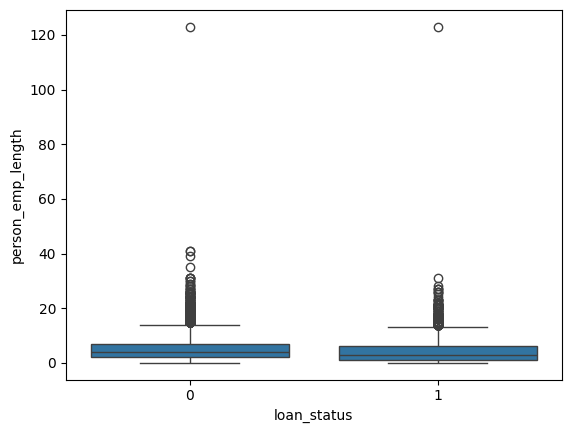

In [ ]:
sns.boxplot(x='loan_status', y='person_emp_length', data=data)

In [ ]:
data.shape

(58623, 12)

In [ ]:
# Here we drop the rows with person_emp_length = 123 as it is an outlier
data.drop(data[data["person_emp_length"] == 123].index, inplace=True)

#### cb_person_cred_hist_length

In [ ]:
data.cb_person_cred_hist_length.value_counts()

cb_person_cred_hist_length
3     10704
2     10655
4     10565
9      3497
8      3476
7      3390
6      3385
10     3364
5      3342
14      926
12      883
11      858
13      850
16      776
15      735
17      725
20       62
24       48
19       47
27       46
28       39
22       38
21       37
23       35
26       31
25       31
30       28
29       26
18       24
Name: count, dtype: int64

In [ ]:
data.cb_person_cred_hist_length.nunique()

29

In [ ]:
(pd.crosstab(data.loan_status, data.cb_person_cred_hist_length, normalize='columns')*100).T

loan_status,0,1
cb_person_cred_hist_length,,
2,84.842797,15.157203
3,85.538117,14.461883
4,85.177473,14.822527
5,86.864153,13.135847
6,86.912851,13.087149
7,87.492625,12.507375
8,86.248562,13.751438
9,86.788676,13.211324
10,86.831153,13.168847


<Axes: xlabel='cb_person_cred_hist_length', ylabel='Count'>

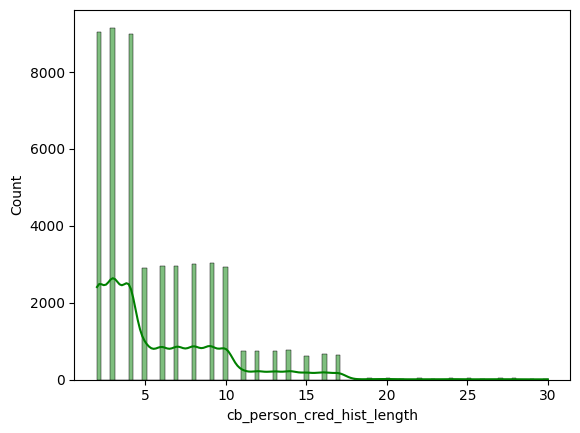

In [ ]:
sns.histplot(data[data["loan_status"] == 0]["cb_person_cred_hist_length"], bins=100, color='green', kde=True)

<Axes: xlabel='cb_person_cred_hist_length', ylabel='Count'>

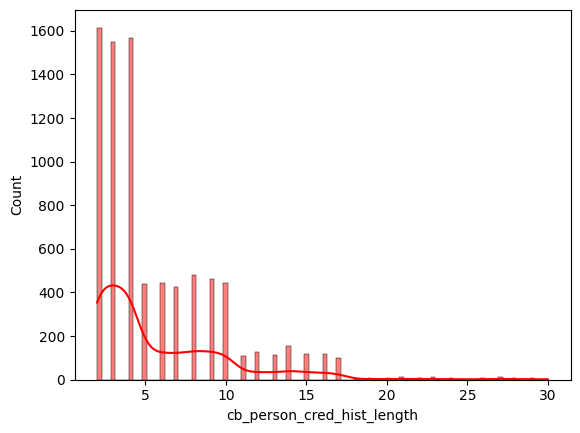

In [ ]:
sns.histplot(data[data["loan_status"] == 1]["cb_person_cred_hist_length"], bins=100, color='red', kde=True)

<Axes: xlabel='cb_person_cred_hist_length', ylabel='Density'>

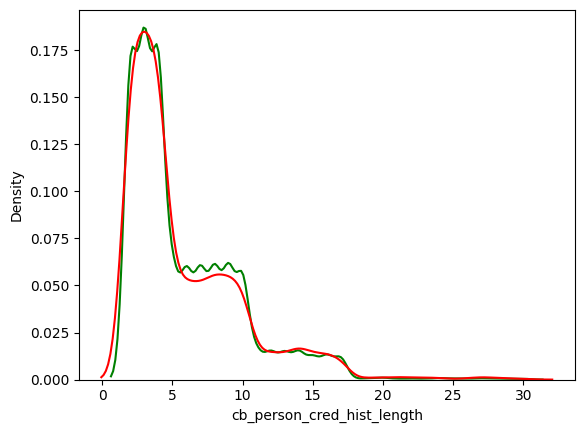

In [ ]:
sns.kdeplot(data[data["loan_status"] == 0].cb_person_cred_hist_length, label="0", color='green')
sns.kdeplot(data[data["loan_status"] == 1].cb_person_cred_hist_length, label="1", color='red')

In [ ]:
# Here both 0 and 1 have almost similar distribution so it looks like it is not useful for the model

#### person_home_ownership

In [ ]:
data.person_home_ownership.value_counts()

person_home_ownership
RENT        30588
MORTGAGE    24810
OWN          3136
OTHER          89
Name: count, dtype: int64

In [ ]:
pd.crosstab(data.loan_status, data.person_home_ownership, normalize='columns')*100

person_home_ownership,MORTGAGE,OTHER,OWN,RENT
loan_status,,,,
0,94.026602,83.146067,98.628827,77.739636
1,5.973398,16.853933,1.371173,22.260364


In [ ]:
data[data["loan_status"] == 0].person_home_ownership.value_counts()

person_home_ownership
RENT        23779
MORTGAGE    23328
OWN          3093
OTHER          74
Name: count, dtype: int64

In [ ]:
data[data["loan_status"] == 1].person_home_ownership.value_counts()

person_home_ownership
RENT        6809
MORTGAGE    1482
OWN           43
OTHER         15
Name: count, dtype: int64

<Axes: xlabel='person_home_ownership', ylabel='count'>

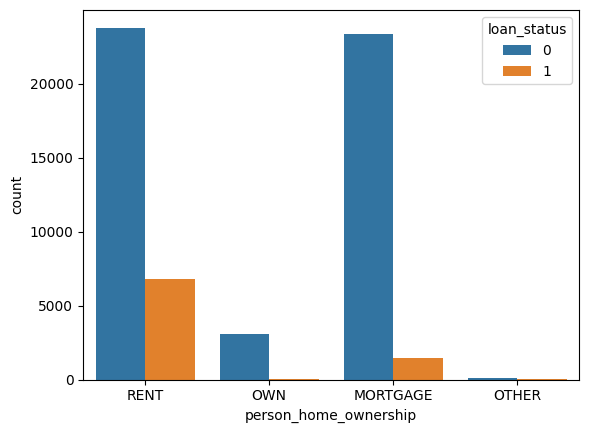

In [ ]:
sns.countplot(x='person_home_ownership', hue='loan_status', data=data)

In [ ]:
# Rent has more loan_status = 1 so this feature might be useful

#### loan_intent

In [ ]:
data.loan_intent.value_counts()

loan_intent
EDUCATION            12269
MEDICAL              10930
PERSONAL             10008
VENTURE              10007
DEBTCONSOLIDATION     9131
HOMEIMPROVEMENT       6278
Name: count, dtype: int64

In [ ]:
data[data["loan_status"] == 0].loan_intent.value_counts()

loan_intent
EDUCATION            10947
VENTURE               9078
MEDICAL               8982
PERSONAL              8678
DEBTCONSOLIDATION     7402
HOMEIMPROVEMENT       5187
Name: count, dtype: int64

In [ ]:
data[data["loan_status"] == 1].loan_intent.value_counts()

loan_intent
MEDICAL              1948
DEBTCONSOLIDATION    1729
PERSONAL             1330
EDUCATION            1322
HOMEIMPROVEMENT      1091
VENTURE               929
Name: count, dtype: int64

In [ ]:
pd.crosstab(data.loan_status, data.loan_intent, normalize='columns')*100

loan_intent,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
loan_status,,,,,,
0,81.064506,89.224876,82.621854,82.177493,86.710631,90.716498
1,18.935494,10.775124,17.378146,17.822507,13.289369,9.283502


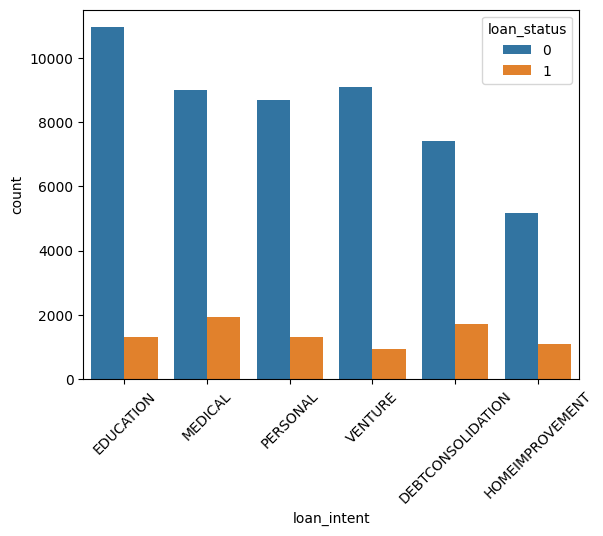

In [ ]:
sns.countplot(x = "loan_intent", hue = "loan_status", data = data).xaxis.set_tick_params(rotation=45)

#### loan_grade

In [ ]:
data.loan_grade.value_counts()

loan_grade
A    20979
B    20388
C    11033
D     5032
E     1009
F      149
G       33
Name: count, dtype: int64

In [ ]:
data[data["loan_status"] == 0].loan_grade.value_counts()

loan_grade
A    19947
B    18301
C     9539
D     2045
E      378
F       58
G        6
Name: count, dtype: int64

In [ ]:
data[data["loan_status"] == 1].loan_grade.value_counts()

loan_grade
D    2987
B    2087
C    1494
A    1032
E     631
F      91
G      27
Name: count, dtype: int64

In [ ]:
pd.crosstab(data.loan_status, data.loan_grade, normalize='columns')*100

loan_grade,A,B,C,D,E,F,G
loan_status,,,,,,,
0,95.080795,89.763586,86.458805,40.639905,37.462834,38.926174,18.181818
1,4.919205,10.236414,13.541195,59.360095,62.537166,61.073826,81.818182


<Axes: xlabel='loan_grade', ylabel='count'>

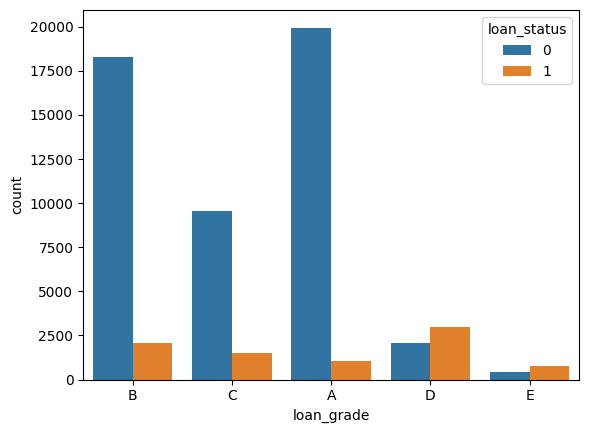

In [ ]:
sns.countplot(x='loan_grade', hue='loan_status', data=data)

In [ ]:
def combine_efg(x):
    if x in ['F', 'G']:
        return 'E'
    else:
        return x

In [ ]:
# here we combine F and G into E as they have very less data
data['loan_grade'] = data['loan_grade'].apply(combine_efg)

In [ ]:
pd.crosstab(data.loan_status, data.loan_grade, normalize='columns')*100

loan_grade,A,B,C,D,E
loan_status,,,,,
0,95.080795,89.763586,86.458805,40.639905,37.111671
1,4.919205,10.236414,13.541195,59.360095,62.888329


#### cb_person_default_on_file

In [ ]:
data.cb_person_default_on_file.value_counts()

cb_person_default_on_file
N    49924
Y     8699
Name: count, dtype: int64

In [ ]:
data[data["loan_status"] == 0].cb_person_default_on_file.value_counts()

cb_person_default_on_file
N    44175
Y     6099
Name: count, dtype: int64

In [ ]:
data[data["loan_status"] == 1].cb_person_default_on_file.value_counts()

cb_person_default_on_file
N    5749
Y    2600
Name: count, dtype: int64

In [ ]:
pd.crosstab(data.loan_status, data.cb_person_default_on_file, normalize='columns')*100

cb_person_default_on_file,N,Y
loan_status,,
0,88.484496,70.111507
1,11.515504,29.888493


<Axes: xlabel='cb_person_default_on_file', ylabel='count'>

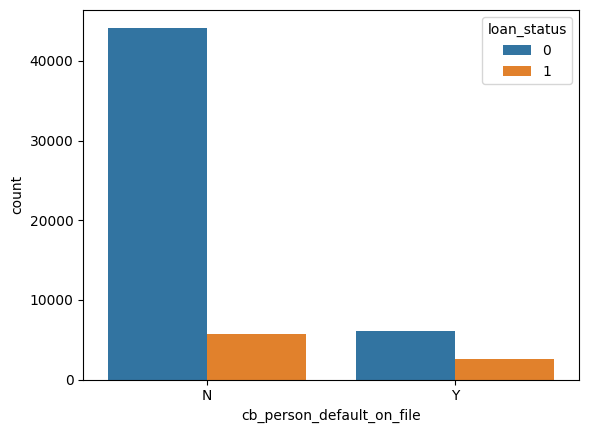

In [ ]:
sns.countplot(x='cb_person_default_on_file', hue='loan_status', data=data)

In [3]:
# Temp
## Here We Drop the rows with person_age = 123 as it is an outlier
data.drop(data[data.person_age == 123].index, inplace=True)

# Here we drop the rows with person_income > 750000 as they are outliers
data.drop(data[data.person_income > 750000].index, inplace=True)

# Here We Drop Loan Percent Income Columns BEcause they are not useful
data.drop(columns="loan_percent_income", inplace=True)

# Here we drop the rows with person_emp_length = 123 as it is an outlier
data.drop(data[data["person_emp_length"] == 123].index, inplace=True)



def combine_efg(x):
    if x in ['F', 'G']:
        return 'E'
    else:
        return x



# here we combine F and G into E as they have very less data
data['loan_grade'] = data['loan_grade'].apply(combine_efg)

## Encoding Process

In [19]:
data_encoded = data.copy()

In [20]:
data_encoded.drop(columns=['id'], inplace=True)

In [7]:
data_encoded = pd.get_dummies(data_encoded, dtype='int')

In [21]:
data_encoded

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,Y,10,0
58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,N,8,1
58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,N,2,1
58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,N,3,0


In [22]:
x = data_encoded.drop(columns="loan_status")
y = data_encoded["loan_status"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)

In [ ]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     10126
           1       0.66      0.72      0.69      1599

    accuracy                           0.91     11725
   macro avg       0.81      0.83      0.82     11725
weighted avg       0.91      0.91      0.91     11725



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

In [ ]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10126
           1       0.90      0.68      0.78      1599

    accuracy                           0.95     11725
   macro avg       0.93      0.84      0.87     11725
weighted avg       0.95      0.95      0.94     11725



### XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)

In [ ]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     10126
           1       0.87      0.73      0.80      1599

    accuracy                           0.95     11725
   macro avg       0.92      0.86      0.88     11725
weighted avg       0.95      0.95      0.95     11725



#### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# # Initialize the model
# xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='auc')

# # Define the parameter grid for hyperparameter tuning
# param_dist = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 5, 7, 10],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'gamma': [0, 1, 5],
#     'min_child_weight': [1, 3, 5, 10]
# }

# # Perform RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=xgb_model,
#     param_distributions=param_dist,
#     scoring='f1',  # Primary metric for RandomizedSearchCV
#     n_iter=50,  # Number of parameter settings to sample
#     cv=5,
#     verbose=1,
#     random_state=42,
#     n_jobs=-1
# )

# # Fit the random search to the data
# random_search.fit(x_train, y_train)

# # Get the best parameters and best score
# best_params = random_search.best_params_
# best_score = random_search.best_score_

# # Evaluate the model with the best parameters on the test set
# best_model = random_search.best_estimator_
# best_model.fit(x_train, y_train)
# xgb_pred = best_model.predict(x_test)

# # Calculate evaluation metrics
# f1 = f1_score(y_test, xgb_pred)
# recall = recall_score(y_test, xgb_pred)
# precision = precision_score(y_test, xgb_pred)
# roc_auc = roc_auc_score(y_test, best_model.predict_proba(x_test)[:, 1])

# # Store results
# results = {
#     'Best Parameters': best_params,
#     'Best F1 Score (RandomizedSearchCV)': best_score,
#     'Test F1 Score': f1,
#     'Test Recall': recall,
#     'Test Precision': precision,
#     'Test ROC-AUC': roc_auc
# }

# # Create a DataFrame to display results
# results_df = pd.DataFrame([results])

# # Print results
# print("Best Parameters:", best_params)
# print("\nResults:")
# print(results_df)

# # Optional: Save results to a CSV file
# # results_df.to_csv('xgb_randomized_tuning_results.csv', index=False)

### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(x_train, y_train)
ada_pred = ada_model.predict(x_test)

In [ ]:
print(roc_auc_score(y_test, ada_pred))

0.6943636508942916


In [ ]:
print(classification_report(y_test, ada_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10126
           1       0.72      0.41      0.53      1599

    accuracy                           0.90     11725
   macro avg       0.82      0.69      0.73     11725
weighted avg       0.89      0.90      0.89     11725



In [ ]:
# # Initialize the model
# ada_model = AdaBoostClassifier(random_state=42)

# # Define the parameter grid for hyperparameter tuning
# param_dist = {
#     'n_estimators': [50, 100, 200],  # Number of weak learners
#     'learning_rate': [0.01, 0.1, 0.5, 1],  # Weight applied to each classifier
#     'algorithm': ['SAMME', 'SAMME.R'],  # Algorithm to use for boosting
# }


# # Perform RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=ada_model,
#     param_distributions=param_dist,
#     scoring='f1',  # Primary metric for RandomizedSearchCV
#     n_iter=50,  # Number of parameter settings to sample
#     cv=5,
#     verbose=1,
#     random_state=42,
#     n_jobs=-1
# )

# # Fit the random search to the data
# random_search.fit(x_train, y_train)

# # Get the best parameters and best score
# best_params = random_search.best_params_
# best_score = random_search.best_score_

# # Evaluate the model with the best parameters on the test set
# best_model = random_search.best_estimator_
# best_model.fit(x_train, y_train)
# ada_pred = best_model.predict(x_test)

# # Calculate evaluation metrics
# f1 = f1_score(y_test, ada_pred)
# recall = recall_score(y_test, ada_pred)
# precision = precision_score(y_test, ada_pred)
# roc_auc = roc_auc_score(y_test, best_model.predict_proba(x_test)[:, 1])

# # Store results
# results = {
#     'Best Parameters': best_params,
#     'Best F1 Score (RandomizedSearchCV)': best_score,
#     'Test F1 Score': f1,
#     'Test Recall': recall,
#     'Test Precision': precision,
#     'Test ROC-AUC': roc_auc
# }

# # Create a DataFrame to display results
# results_df = pd.DataFrame([results])

# # Print results
# print("Best Parameters:", best_params)
# print("\nResults:")
# print(results_df)

# # Optional: Save results to a CSV file
# # results_df.to_csv('cat_randomized_tuning_results.csv', index=False)

### CatBoost

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cat_model = CatBoostClassifier(random_state=42)
cat_model.fit(x_train, y_train)
cat_pred = cat_model.predict(x_test)

Learning rate set to 0.053274
0:	learn: 0.6318737	total: 14.5ms	remaining: 14.5s
1:	learn: 0.5851549	total: 27.9ms	remaining: 13.9s
2:	learn: 0.5403264	total: 40.8ms	remaining: 13.6s
3:	learn: 0.5000253	total: 55.5ms	remaining: 13.8s
4:	learn: 0.4667128	total: 72.3ms	remaining: 14.4s
5:	learn: 0.4450827	total: 85ms	remaining: 14.1s
6:	learn: 0.4187863	total: 97.9ms	remaining: 13.9s
7:	learn: 0.3955735	total: 113ms	remaining: 14s
8:	learn: 0.3753839	total: 126ms	remaining: 13.8s
9:	learn: 0.3599687	total: 145ms	remaining: 14.3s
10:	learn: 0.3458504	total: 174ms	remaining: 15.6s
11:	learn: 0.3331979	total: 187ms	remaining: 15.4s
12:	learn: 0.3223502	total: 203ms	remaining: 15.4s
13:	learn: 0.3110510	total: 216ms	remaining: 15.2s
14:	learn: 0.3030089	total: 230ms	remaining: 15.1s
15:	learn: 0.2960421	total: 244ms	remaining: 15s
16:	learn: 0.2880026	total: 258ms	remaining: 14.9s
17:	learn: 0.2816503	total: 272ms	remaining: 14.8s
18:	learn: 0.2763415	total: 286ms	remaining: 14.8s
19:	learn:

In [ ]:
print(roc_auc_score(y_test, cat_pred))

0.8550732317514761


In [ ]:
print(classification_report(y_test, cat_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10126
           1       0.89      0.72      0.80      1599

    accuracy                           0.95     11725
   macro avg       0.93      0.86      0.89     11725
weighted avg       0.95      0.95      0.95     11725



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score

In [ ]:
# Initialize the model
cat_model = CatBoostClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_dist = {
    'iterations': [100, 200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'border_count': [32, 64, 128],
    'bagging_temperature': [0, 0.2, 0.5, 1],
    'random_strength': [1, 2, 5, 10],
    'scale_pos_weight': [1, 2, 5, 10],
    'subsample': [0.6, 0.8, 1.0]
}


# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_dist,
    scoring='f1',  # Primary metric for RandomizedSearchCV
    n_iter=50,  # Number of parameter settings to sample
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the random search to the data
random_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Evaluate the model with the best parameters on the test set
best_model = random_search.best_estimator_
best_model.fit(x_train, y_train)
cat_pred = best_model.predict(x_test)

# Calculate evaluation metrics
f1 = f1_score(y_test, cat_pred)
recall = recall_score(y_test, cat_pred)
precision = precision_score(y_test, cat_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(x_test)[:, 1])

# Store results
results = {
    'Best Parameters': best_params,
    'Best F1 Score (RandomizedSearchCV)': best_score,
    'Test F1 Score': f1,
    'Test Recall': recall,
    'Test Precision': precision,
    'Test ROC-AUC': roc_auc
}

# Create a DataFrame to display results
results_df = pd.DataFrame([results])

# Print results
print("Best Parameters:", best_params)
print("\nResults:")
print(results_df)

# Optional: Save results to a CSV file
# results_df.to_csv('cat_randomized_tuning_results.csv', index=False)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
0:	learn: 0.6130514	total: 56.4ms	remaining: 28.1s
1:	learn: 0.5496815	total: 110ms	remaining: 27.3s
2:	learn: 0.5018055	total: 154ms	remaining: 25.4s
3:	learn: 0.4639177	total: 186ms	remaining: 23s
4:	learn: 0.4330544	total: 234ms	remaining: 23.2s
5:	learn: 0.4084160	total: 264ms	remaining: 21.8s
6:	learn: 0.3889083	total: 312ms	remaining: 22s
7:	learn: 0.3742662	total: 346ms	remaining: 21.3s
8:	learn: 0.3607171	total: 371ms	remaining: 20.3s
9:	learn: 0.3492097	total: 408ms	remaining: 20s
10:	learn: 0.3407060	total: 451ms	remaining: 20.1s
11:	learn: 0.3331530	total: 483ms	remaining: 19.6s
12:	learn: 0.3264503	total: 522ms	remaining: 19.5s
13:	learn: 0.3203851	total: 563ms	remaining: 19.6s
14:	learn: 0.3159891	total: 605ms	remaining: 19.6s
15:	learn: 0.3110926	total: 647ms	remaining: 19.6s
16:	learn: 0.3068249	total: 679ms	remaining: 19.3s
17:	learn: 0.3030268	total: 726ms	remaining: 19.4s
18:	learn: 0.2997338	total: 765ms	r

# Final Model

In [ ]:
# Best Parameters: {'subsample': 0.6, 'scale_pos_weight': 2, 'random_strength': 1, 'learning_rate': 0.1, 'l2_leaf_reg': 5, 'iterations': 500, 'depth': 6, 'border_count': 128, 'bagging_temperature': 1}

best_cat_model = CatBoostClassifier(subsample= 0.6, scale_pos_weight= 2, random_strength= 1, learning_rate= 0.1, l2_leaf_reg= 5, iterations= 500, depth= 6, border_count= 128, bagging_temperature= 1)
best_cat_model.fit(x_train, y_train)
best_cat_pred = best_cat_model.predict(x_test)

0:	learn: 0.6101768	total: 37.7ms	remaining: 18.8s
1:	learn: 0.5470398	total: 67.9ms	remaining: 16.9s
2:	learn: 0.5009237	total: 103ms	remaining: 17s
3:	learn: 0.4640042	total: 119ms	remaining: 14.7s
4:	learn: 0.4372362	total: 135ms	remaining: 13.4s
5:	learn: 0.4128509	total: 171ms	remaining: 14.1s
6:	learn: 0.3927785	total: 206ms	remaining: 14.5s
7:	learn: 0.3769162	total: 229ms	remaining: 14.1s
8:	learn: 0.3643272	total: 248ms	remaining: 13.5s
9:	learn: 0.3527931	total: 269ms	remaining: 13.2s
10:	learn: 0.3435846	total: 307ms	remaining: 13.6s
11:	learn: 0.3362281	total: 341ms	remaining: 13.9s
12:	learn: 0.3317115	total: 374ms	remaining: 14s
13:	learn: 0.3246757	total: 407ms	remaining: 14.1s
14:	learn: 0.3196574	total: 436ms	remaining: 14.1s
15:	learn: 0.3147643	total: 474ms	remaining: 14.3s
16:	learn: 0.3107111	total: 507ms	remaining: 14.4s
17:	learn: 0.3069560	total: 538ms	remaining: 14.4s
18:	learn: 0.3031292	total: 569ms	remaining: 14.4s
19:	learn: 0.2995643	total: 605ms	remaining

In [ ]:
print(classification_report(y_test, best_cat_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     10126
           1       0.84      0.75      0.80      1599

    accuracy                           0.95     11725
   macro avg       0.90      0.87      0.88     11725
weighted avg       0.95      0.95      0.95     11725



### lightgbm

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
light_model = LGBMClassifier(random_state=42)
light_model.fit(x_train, y_train)
light_pred = light_model.predict(x_test)

[LightGBM] [Info] Number of positive: 6750, number of negative: 40148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 801
[LightGBM] [Info] Number of data points in the train set: 46898, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.143929 -> initscore=-1.783030
[LightGBM] [Info] Start training from score -1.783030


In [ ]:
print(roc_auc_score(y_test, light_pred))

0.8545301681613422


In [ ]:
print(classification_report(y_test, light_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10126
           1       0.90      0.72      0.80      1599

    accuracy                           0.95     11725
   macro avg       0.93      0.85      0.89     11725
weighted avg       0.95      0.95      0.95     11725



In [ ]:
# Initialize the model
light_model = lightgbm.LGBMClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100],  # Number of boosting rounds
    'learning_rate': [0.05, 0.1],  # Step size shrinkage
    'num_leaves': [15, 31],  # Maximum number of leaves in one tree
    'max_depth': [-1, 10],  # Maximum tree depth (-1 means no limit)
}


# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=light_model,
    param_distributions=param_dist,
    scoring='f1',  # Primary metric for RandomizedSearchCV
    n_iter=50,  # Number of parameter settings to sample
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the random search to the data
random_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Evaluate the model with the best parameters on the test set
best_model = random_search.best_estimator_
best_model.fit(x_train, y_train)
light_pred = best_model.predict(x_test)

# Calculate evaluation metrics
f1 = f1_score(y_test, light_pred)
recall = recall_score(y_test, light_pred)
precision = precision_score(y_test, light_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(x_test)[:, 1])

# Store results
results = {
    'Best Parameters': best_params,
    'Best F1 Score (RandomizedSearchCV)': best_score,
    'Test F1 Score': f1,
    'Test Recall': recall,
    'Test Precision': precision,
    'Test ROC-AUC': roc_auc
}

# Create a DataFrame to display results
results_df = pd.DataFrame([results])

# Print results
print("Best Parameters:", best_params)
print("\nResults:")
print(results_df)

# Optional: Save results to a CSV file
results_df.to_csv('light_randomized_tuning_results.csv', index=False)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=50. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Info] Number of positive: 6750, number of negative: 40148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000952 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 801
[LightGBM] [Info] Number of data points in the train set: 46898, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.143929 -> initscore=-1.783030
[LightGBM] [Info] Start training from score -1.783030
[LightGBM] [Info] Number of positive: 6750, number of negative: 40148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002436 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 801
[LightGBM] [Info] Number of data points in the train set: 46898, number of used features: 23
[LightGBM] [Info] [binary

In [ ]:
best_light_model = lightgbm.LGBMClassifier(n_estimators= 100, num_leaves= 31, max_depth= -1, learning_rate= 0.1)
best_light_model.fit(x_train, y_train)
best_light_pred = best_light_model.predict(x_test)

[LightGBM] [Info] Number of positive: 6750, number of negative: 40148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 801
[LightGBM] [Info] Number of data points in the train set: 46898, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.143929 -> initscore=-1.783030
[LightGBM] [Info] Start training from score -1.783030


In [ ]:
print(classification_report(y_test, best_light_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10126
           1       0.90      0.72      0.80      1599

    accuracy                           0.95     11725
   macro avg       0.93      0.85      0.89     11725
weighted avg       0.95      0.95      0.95     11725



### Voting Classifier

In [ ]:
# !pip install --upgrade scikit-learn xgboost

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
# voting_model = VotingClassifier(
#     estimators=[
#         ('xgb', xgb_model),
#         ('catboost', best_cat_model),
#         ('lightgbm', best_light_model)
#     ],
#     voting='soft'  # 'soft' for probabilities; 'hard' for majority voting
# )

voting_model = VotingClassifier(
    estimators=[
        ('catboost', best_cat_model),
        ('lightgbm', best_light_model),
        ('adaboost', ada_model)
    ],
    voting='soft'
)


In [ ]:
voting_model.fit(x_train, y_train)
voting_pred = voting_model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


0:	learn: 0.5779453	total: 19ms	remaining: 3.79s
1:	learn: 0.4958489	total: 34.6ms	remaining: 3.43s
2:	learn: 0.4426374	total: 48.3ms	remaining: 3.17s
3:	learn: 0.3997455	total: 61.6ms	remaining: 3.02s
4:	learn: 0.3684130	total: 75.2ms	remaining: 2.93s
5:	learn: 0.3414635	total: 89.3ms	remaining: 2.89s
6:	learn: 0.3195530	total: 102ms	remaining: 2.82s
7:	learn: 0.3016575	total: 120ms	remaining: 2.89s
8:	learn: 0.2894874	total: 135ms	remaining: 2.87s
9:	learn: 0.2770549	total: 149ms	remaining: 2.84s
10:	learn: 0.2678094	total: 164ms	remaining: 2.81s
11:	learn: 0.2580878	total: 178ms	remaining: 2.78s
12:	learn: 0.2528258	total: 191ms	remaining: 2.75s
13:	learn: 0.2449427	total: 208ms	remaining: 2.77s
14:	learn: 0.2400770	total: 227ms	remaining: 2.8s
15:	learn: 0.2361123	total: 242ms	remaining: 2.78s
16:	learn: 0.2319646	total: 255ms	remaining: 2.75s
17:	learn: 0.2287633	total: 268ms	remaining: 2.71s
18:	learn: 0.2251597	total: 286ms	remaining: 2.72s
19:	learn: 0.2220070	total: 300ms	rema

In [ ]:
print(classification_report(y_test, voting_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10126
           1       0.91      0.72      0.81      1599

    accuracy                           0.95     11725
   macro avg       0.93      0.86      0.89     11725
weighted avg       0.95      0.95      0.95     11725



In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC(random_state=42)
svm_model.fit(x_train_scaled, y_train)
svm_pred = svm_model.predict(x_test_scaled)

In [ ]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10126
           1       0.87      0.59      0.70      1599

    accuracy                           0.93     11725
   macro avg       0.90      0.79      0.83     11725
weighted avg       0.93      0.93      0.93     11725



### NNM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential([
    Dense(64, input_dim=x_train_scaled.shape[1], activation='relu'),
    Dropout(0.3),  # Prevent overfitting
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8744 - loss: 0.3246 - val_accuracy: 0.9231 - val_loss: 0.2184
Epoch 2/50
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9153 - loss: 0.2402 - val_accuracy: 0.9309 - val_loss: 0.2028
Epoch 3/50
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9262 - loss: 0.2209 - val_accuracy: 0.9378 - val_loss: 0.1951
Epoch 4/50
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9295 - loss: 0.2116 - val_accuracy: 0.9390 - val_loss: 0.1908
Epoch 5/50
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9341 - loss: 0.2061 - val_accuracy: 0.9385 - val_loss: 0.1909
Epoch 6/50
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9353 - loss: 0.2038 - val_accuracy: 0.9414 - val_loss: 0.1869
Epoch 7/50
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9386 - loss: 0.1958 - val_accuracy: 0.9414 - val_loss: 0.1862
Epoch 8/50
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9394 - loss: 0.1963 - 

In [ ]:
nnm_pred = (model.predict(x_test_scaled) > 0.5).astype("int32")
# print("Accuracy:", accuracy_score(y_test, nnm_pred))
print("Classification Report:\n", classification_report(y_test, nnm_pred))

367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     10126
           1       0.90      0.69      0.78      1599

    accuracy                           0.95     11725
   macro avg       0.93      0.84      0.87     11725
weighted avg       0.95      0.95      0.94     11725



### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)
gnb_pred = gnb_model.predict(x_test)

In [ ]:
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10126
           1       0.66      0.38      0.49      1599

    accuracy                           0.89     11725
   macro avg       0.79      0.68      0.71     11725
weighted avg       0.88      0.89      0.88     11725



### Ensemble Learning

In [ ]:
data.loan_status.value_counts()

,count
loan_status,
0,50274
1,8349


#### With catboost

In [ ]:
# Separate data based on loan_status
class_0 = data_encoded[data_encoded['loan_status'] == 0]
class_1 = data_encoded[data_encoded['loan_status'] == 1]

# Split class_0 into three equal parts
class_0_split = np.array_split(class_0, 3)

# Create three datasets
datasets = [
    pd.concat([part, class_1], axis=0).sample(frac=1, random_state=42)  # Shuffle the dataset
    for part in class_0_split
]

# Initialize three CatBoost models
catboost_models = [
    CatBoostClassifier(
        iterations=200, learning_rate=0.1, depth=6, random_state=42, verbose=0
    )
    for _ in range(3)
]

# Train each model
for i, dataset in enumerate(datasets):
    X = dataset.drop('loan_status', axis=1)
    y = dataset['loan_status']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    catboost_models[i].fit(X_train, y_train)

# Create a Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('catboost1', catboost_models[0]),
        ('catboost2', catboost_models[1]),
        ('catboost3', catboost_models[2]),
    ],
    voting='soft'  # Use soft voting for probabilities
)

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Evaluate the Voting Classifier
y_pred = voting_clf.predict(X_test)

from sklearn.metrics import classification_report

print("Voting Classifier Performance:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Voting Classifier Performance:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      3346
           1       0.91      0.79      0.85      1676

    accuracy                           0.90      5022
   macro avg       0.91      0.88      0.89      5022
weighted avg       0.90      0.90      0.90      5022



#### With Catboost and Lightgbm

In [ ]:
# Initialize three CatBoost models
catboost_models = [
    CatBoostClassifier(
        iterations=200, learning_rate=0.1, depth=6, random_state=42, verbose=0
    )
    for _ in range(3)
]

# Initialize three LGBM models
lgbm_models = [
    LGBMClassifier(
        n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42
    )
    for _ in range(3)
]

# Train each CatBoost model on the respective dataset
for i, dataset in enumerate(datasets):
    X = dataset.drop('loan_status', axis=1)
    y = dataset['loan_status']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    catboost_models[i].fit(X_train, y_train)

# Train each LGBM model on the respective dataset
for i, dataset in enumerate(datasets):
    X = dataset.drop('loan_status', axis=1)
    y = dataset['loan_status']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    lgbm_models[i].fit(X_train, y_train)

# Create a Voting Classifier with all six models
voting_clf = VotingClassifier(
    estimators=[
        ('catboost1', catboost_models[0]),
        ('catboost2', catboost_models[1]),
        ('catboost3', catboost_models[2]),
        ('lgbm1', lgbm_models[0]),
        ('lgbm2', lgbm_models[1]),
        ('lgbm3', lgbm_models[2]),
    ],
    voting='soft'  # Use soft voting for better handling of imbalanced datasets
)

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Evaluate the Voting Classifier
y_pred = voting_clf.predict(X_test)

print("Voting Classifier Performance:")
print(classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 6673, number of negative: 13412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 796
[LightGBM] [Info] Number of data points in the train set: 20085, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.332238 -> initscore=-0.698080
[LightGBM] [Info] Start training from score -0.698080
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6673, number of negative: 13412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 792
[LightGBM] [Info] Number of data points in the train set: 20085, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.332238 -> initscore=-0.698080
[LightGBM] [Info] Start training from score -0.698080
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

## Pipeline

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Separate data based on loan_status
class_0 = data_encoded[data_encoded['loan_status'] == 0]
class_1 = data_encoded[data_encoded['loan_status'] == 1]

# Split class_0 into three equal parts
class_0_split = np.array_split(class_0, 3)

# Create three datasets
datasets = [
    pd.concat([part, class_1], axis=0).sample(frac=1, random_state=42)  # Shuffle the dataset
    for part in class_0_split
]

# Define preprocessing: OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(dtype='float', handle_unknown='ignore'), data_encoded.drop('loan_status', axis=1).columns)
    ],
    remainder='passthrough'
)

# Initialize models
catboost_models = [CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6, random_state=42, verbose=0) for _ in range(3)]
lgbm_models = [LGBMClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42) for _ in range(3)]

# Lists to store results
trained_models = []
model_names = []

# Train each CatBoost model
for i, dataset in enumerate(datasets):
    X = dataset.drop('loan_status', axis=1)
    y = dataset['loan_status']

    # Preprocess the data
    X = preprocessor.fit_transform(X)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    catboost_models[i].fit(X_train, y_train)
    trained_models.append((f'catboost_{i+1}', catboost_models[i]))
    model_names.append(f'catboost_{i+1}')

# Train each LGBM model
for i, dataset in enumerate(datasets):
    X = dataset.drop('loan_status', axis=1)
    y = dataset['loan_status']

    # Preprocess the data
    X = preprocessor.transform(X)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    lgbm_models[i].fit(X_train, y_train)
    trained_models.append((f'lgbm_{i+1}', lgbm_models[i]))
    model_names.append(f'lgbm_{i+1}')

# Create a Voting Classifier with all models
voting_clf = VotingClassifier(estimators=trained_models, voting='soft')

# Final Training and Evaluation
X = data_encoded.drop('loan_status', axis=1)
y = data_encoded['loan_status']
X = preprocessor.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
voting_clf.fit(X_train, y_train)

# Predict and Evaluate
y_pred = voting_clf.predict(X_test)

print("Voting Classifier Performance:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6673, number of negative: 13412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 20085, number of used features: 510
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.332238 -> initscore=-0.698080
[LightGBM] [Info] Start training from score -0.698080
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6673, number of negative: 13412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1036
[LightGBM] [Info] Number of data points in the train set: 20085, number of used features: 518
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.332238 -> initscore=-0.698080
[LightGBM] [Info] Start training from score -0.698080
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6673, number of negative: 13412
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1024
[LightGBM] [Info] Number of data points in the train set: 20085, number of used features: 512
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.332238 -> initscore=-0.698080
[LightGBM] [Info] Start training from score -0.698080
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6749, number of negative: 40149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1280
[LightGBM] [Info] Number of data points in the train set: 46898, number of used features: 640
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.143908 -> initscore=-1.783203
[LightGBM] [Info] Start training from score -1.783203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6749, number of negative: 40149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014848 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1280
[LightGBM] [Info] Number of data points in the train set: 46898, number of used features: 640
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.143908 -> initscore=-1.783203
[LightGBM] [Info] Start training from score -1.783203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1280
[LightGBM] [Info] Number of data points in the train set: 46898, number of used features: 640
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.143908 -> initscore=-1.783203
[LightGBM] [Info] Start training from score -1.783203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Voting Classifier Performance:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10125
           1       0.92      0.70      0.80      1600

    accuracy                           0.95     11725
   macro avg       0.94      0.85      0.88     11725
weighted avg       0.95      0.95      0.95     11725



# Other

In [ ]:
# Here We Drop ID Columns BEcause they are not useful
# data.drop(columns="id", inplace=True)

In [12]:
from catboost import CatBoostClassifier

In [ ]:
# x = data.drop(columns="loan_status")
# y = data["loan_status"]

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2)

In [18]:
data_encoded.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'cb_person_cred_hist_length', 'loan_status',
       'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')

In [23]:
# Define the preprocessing step: OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(dtype='int', handle_unknown='ignore'), data_encoded.select_dtypes(include=['object']).columns)
    ]
)

# Define the CatBoostClassifier model
model = CatBoostClassifier(
    subsample=0.6,
    scale_pos_weight=2,
    random_strength=1,
    learning_rate=0.1,
    l2_leaf_reg=5,
    iterations=500,
    depth=6,
    border_count=128,
    bagging_temperature=1,
    verbose=0
)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', model)
])

# Fit the pipeline
pipeline.fit(x_train, y_train)

# Make predictions
y_pred = pipeline.predict(x_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.94     10126
           1       0.74      0.43      0.55      1599

    accuracy                           0.90     11725
   macro avg       0.83      0.70      0.75     11725
weighted avg       0.89      0.90      0.89     11725



In [ ]:
test = pd.DataFrame(
    {
        "person_age": [23],
        "person_income": [44000],
        "person_home_ownership": ['RENT'],
        "person_emp_length": [7.0],
        "loan_intent": ['EDUCATION'],
        "loan_grade": ['D'],
        "loan_amnt": [6800],
        "loan_int_rate": [16.00],
        "cb_person_default_on_file": ['N'],
        "cb_person_cred_hist_length": [2]
    }
)
p = pipeline.predict(test)
p

NameError: name 'OWN' is not defined